In [11]:
import random
import math
import pandas as pd
import matplotlib.pyplot as plt

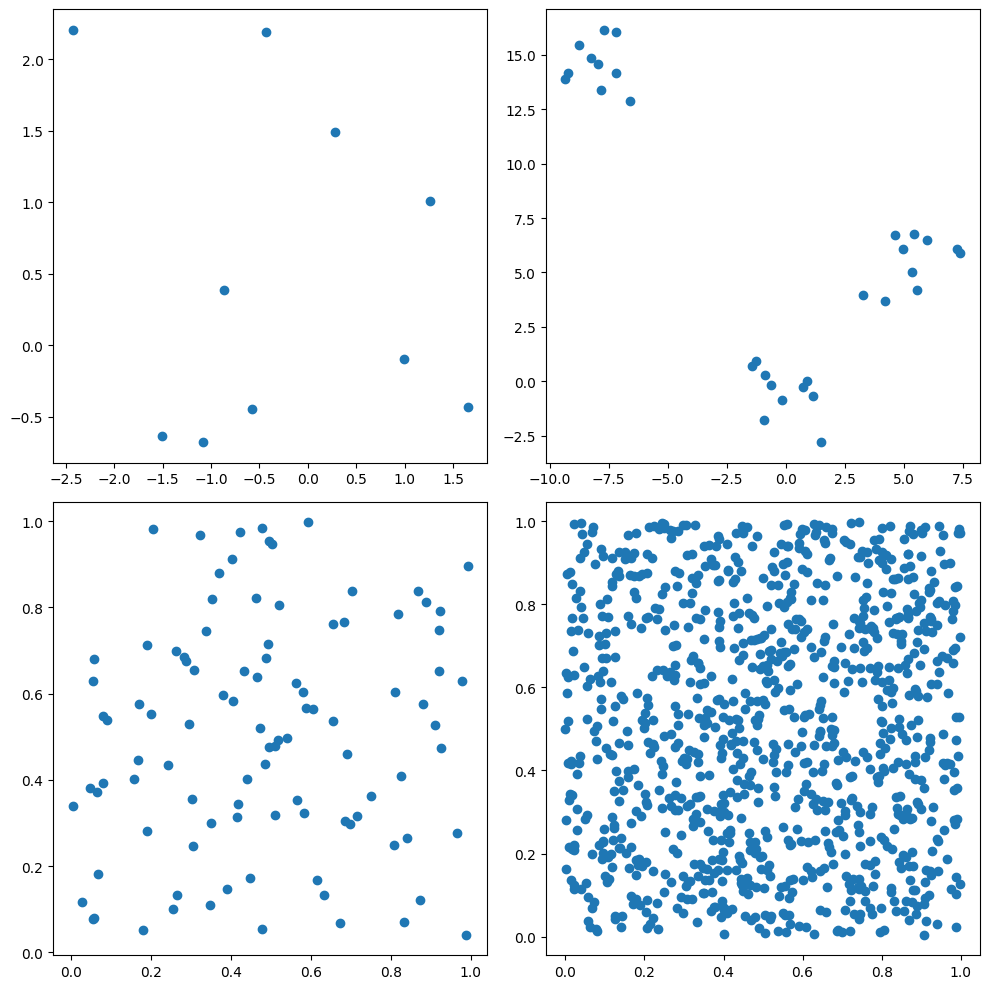

In [10]:
tiny = pd.read_csv('tiny.csv', names=['X', 'Y'], header=None)
small = pd.read_csv('small.csv', names=['X', 'Y'], header=None)
medium = pd.read_csv('medium.csv', names=['X', 'Y'], header=None)
large = pd.read_csv('large.csv', names=['X', 'Y'], header=None)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(tiny['X'], tiny['Y'])
axs[0, 1].scatter(small['X'], small['Y'])
axs[1, 0].scatter(medium['X'], medium['Y'])
axs[1, 1].scatter(large['X'], large['Y'])
plt.tight_layout()
plt.show()

In [12]:
def distance(city1, city2):
    return math.sqrt((city1[0] - city2[0]) ** 2 + (city1[1] - city2[1]) ** 2)

In [13]:
def total_distance(route):
    return sum(distance(cities[route[i]], cities[route[i+1]]) for i in range(len(route) - 1)) + distance(cities[route[-1]], cities[route[0]])
# route[-1]: last city in the route
# route[0]: first city in the route
# returns the total distance of traveling

In [14]:
def generate_initial_route(num_cities):
  route = list(range(num_cities)) # converts the range object into a list
  random.shuffle(route) # randomly rearranges the elements of the route list
  return route # returns the shuffled route list
# each city = indexed from 0 to num_cities - 1
# range(num_cities) = index of each city

In [15]:
# Function to create k neighboring routes of the current route
def get_neighbors(route, k):  # route = current route; k is the number of neighbors to generate
    neighbors = [] # store the generated neighboring routes
    for _ in range(k): # k times to generate k neighboring routes
    # The underscore _ is used as a loop variable because the value of the loop index is not needed inside the loop
        new_route = route[:] # current route shallow copy creates
        #  randomly selects two distinct indices i and j
        i, j = random.sample(range(len(route)), 2)  # range(len(route)) = range of indices from 0 to len(route) - 1
        new_route[i], new_route[j] = new_route[j], new_route[i]  # Swap two cities
        neighbors.append(new_route) # newly generated neighboring route
    return neighbors # generating k neighboring routes list returns

Hill climbing shortest route: [4, 8, 2, 7, 6, 9, 3, 0, 5, 1]
Hill climbing shortest distance: 15.561998333107589


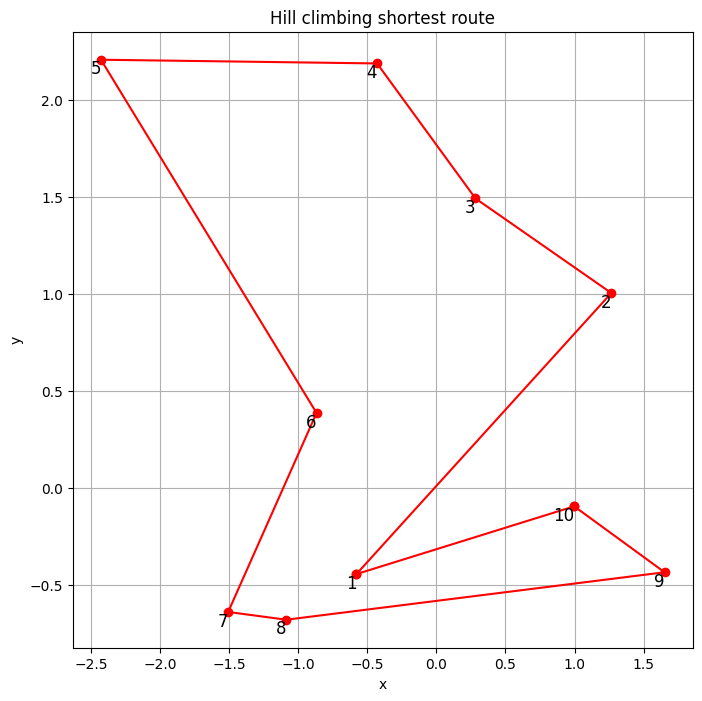

In [16]:
def hill_climbing(cities, k = 10): # k = number of neighboring routes to generate in each iteration
    current_route = generate_initial_route(len(cities)) # generates an initial random route
    current_distance = total_distance(current_route) # total distance of the initial route

    while True:
      neighbors = get_neighbors(current_route, k) # enerates k and swapping pairs of cities in the current_route
      next_route = min(neighbors, key=lambda r: total_distance(r)) # finds the neighbor with the minimum total distance; lambda function used
      next_distance = total_distance(next_route) # total distance of the best neighbor route.

      if next_distance >= current_distance:  # If no improvement, terminate; this is bad distance
          break

      current_route, current_distance = next_route, next_distance

    return current_route, current_distance # returns the best route and total distance

# code to print the cost and visualize the route
# Only one dataset is active at a time
cities = list(zip(tiny['X'], tiny['Y']))
#cities = list(zip(small['X'], small['Y']))
#cities = list(zip(medium['X'], medium['Y']))
#cities = list(zip(large['X'], large['Y']))
best_route, best_distance = hill_climbing(cities) # calls the hill_climbing() function with the current cities dataset.
print(f"Hill climbing shortest route: {best_route}")
print(f"Hill climbing shortest distance: {best_distance}")
plt.figure(figsize=(8,8))
for i, index in enumerate(best_route):  #  Annotate Cities on the Plot starting from 1
    x, y = cities[index]
    plt.text(x, y, str(i+1), fontsize=12, color='black', ha='right', va='top')
# Plot the Route
plt.plot([cities[i][0] for i in best_route], [cities[i][1] for i in best_route], 'ro-')
plt.plot([cities[best_route[-1]][0], cities[best_route[0]][0]], [cities[best_route[-1]][1], cities[best_route[0]][1]], 'ro-')
plt.title("Hill climbing shortest route")
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

Simulated annealing shortest route: [1, 4, 0, 3, 9, 6, 7, 2, 8, 5]
Simulated annealing shortest distance: 12.516978039789697


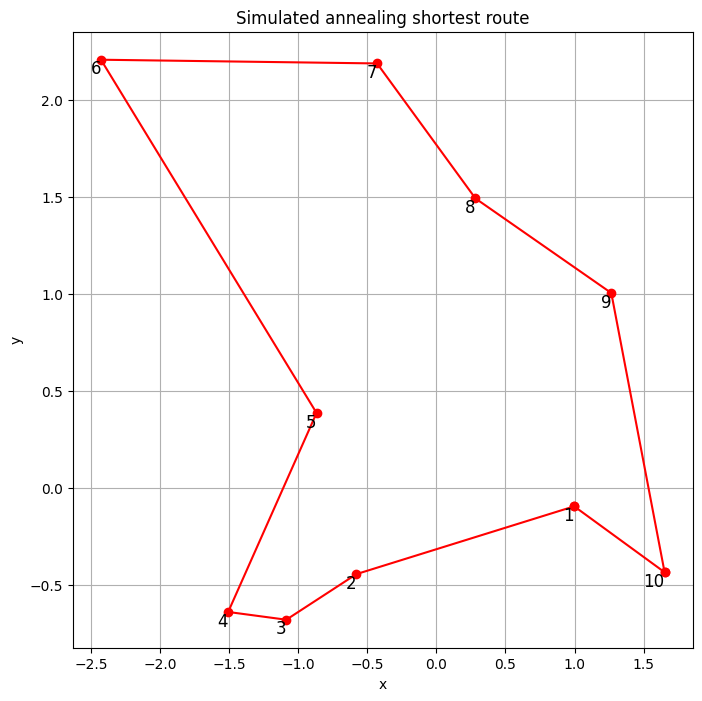

In [17]:
def simulated_annealing(cities, intial_temp, cooling_rate, max_iteration):
    current_route = generate_initial_route(len(cities)) # generates a random initial route
    current_distance = total_distance(current_route) # calculates total distance of the randomly generated route
    best_route = current_route.copy() # Creates a copy of the current route, updated when improvements are found
    best_distance = current_distance
    # Temperature is initialized with the value passed as the initial_temp parameter.
    temperature = intial_temp

    for iteration in range(max_iterations):
        i, j = random.sample(range(len(cities)), 2) # randomly selects two distinct indices i and j
        new_route = current_route[:] # creates a shallow copy of the current route
        new_route[i], new_route[j] = new_route[j], new_route[i]  # Swap two cities
        new_distance = total_distance(new_route)

        # Decide if we accept the new route
        # random.random() = generates a random number between 0 and 1.
        # math.exp((current_distance - new_distance) / temperature) = calculates the acceptance probability for a worse solution.
        if new_distance < current_distance or random.random() < math.exp((current_distance - new_distance) / temperature):
            current_route, current_distance = new_route, new_distance # checks if the new current distance is shorter than the best distance found.
            if current_distance < best_distance:
              # best_route = current_route[:]: copies the current route as the new best route
              # best_distance = current_distance: updates the best distance
                best_route, best_distance = current_route[:], current_distance

        temperature *= cooling_rate  # Cool down

    return best_route, best_distance

# Selecting Cities Data
# Only one dataset is active at a time
cities = list(zip(tiny['X'], tiny['Y']))
#cities = list(zip(small['X'], small['Y']))
#cities = list(zip(medium['X'], medium['Y']))
#cities = list(zip(large['X'], large['Y']))
# Parameters for Simulated Annealing
initial_temp = 100 # initial temperature
cooling_rate = 0.99 # temperature decreases by 1% after each iteration
max_iterations = 1000
best_route, best_distance = simulated_annealing(cities, initial_temp, cooling_rate, max_iterations)
print(f"Simulated annealing shortest route: {best_route}")
print(f"Simulated annealing shortest distance: {best_distance}")
plt.figure(figsize=(8,8))
for i, index in enumerate(best_route):
    x, y = cities[index]
    plt.text(x, y, str(i+1), fontsize=12, color='black', ha='right', va='top') # places the index of the city next to its coordinates
# Plots the route connecting the cities
# 'ro-': Red dots connected by lines
# The first plot command draws the lines connecting each city in the route
# The second plot command connects the last city back to the first city to complete the cycle
plt.plot([cities[i][0] for i in best_route], [cities[i][1] for i in best_route], 'ro-')
plt.plot([cities[best_route[-1]][0], cities[best_route[0]][0]], [cities[best_route[-1]][1], cities[best_route[0]][1]], 'ro-')
plt.title("Simulated annealing shortest route")
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()